In [ ]:
#!conda install -c conda-forge lightgbm
#!pip install optuna

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import sys
import os
import re
import random

from time import time
from tqdm import tqdm

from contextlib import contextmanager
import lightgbm as lgb
#import optuna.integration.lightgbm as opt_lgb

In [ ]:
#上限表示数を拡張
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 200)

In [ ]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
INPUT = "/content/drive/MyDrive/nishika/" # 所望のディレクトリに変更してください。
train_df = pd.read_csv(os.path.join(INPUT, "train.csv"))
test_df = pd.read_csv(os.path.join(INPUT, "test.csv"))
submission_df = pd.read_csv(os.path.join(INPUT, "sample_submission.csv"))

In [ ]:
#df_1_tr = pd.read_csv("/content/drive/MyDrive/nishika/output/train_SwinTransformerLarge384_V2Large256.csv")
#df_1_ts = pd.read_csv("/content/drive/MyDrive/nishika/output/test_SwinTransformerLarge384_V2Large256.csv")

In [ ]:
df_2_tr = pd.read_csv("/content/drive/MyDrive/nishika/output/train_efb2_rinnabase.csv")
df_2_ts = pd.read_csv("/content/drive/MyDrive/nishika/output/test_efb2_rinnabase.csv")

In [ ]:
df_2_tr = df_2_tr.drop(df_2_tr.columns[352:], axis=1)

In [ ]:
df_2_ts = df_2_ts.drop(df_2_ts.columns[352:], axis=1)

In [ ]:
#df_3_tr = pd.read_csv("/content/drive/MyDrive/nishika/output/train_swinv2base256_ginza510electra.csv")
#df_3_ts = pd.read_csv("/content/drive/MyDrive/nishika/output/test_swinv2base256_ginza510electra.csv")

In [ ]:
df_4_tr = pd.read_csv("/content/drive/MyDrive/nishika/output/train_efv2b2_resnet152_jaginza.csv")
df_4_ts = pd.read_csv("/content/drive/MyDrive/nishika/output/test_efv2b2_resnet152_jaginza.csv")

In [ ]:
df_4_tr = df_4_tr.drop(df_4_tr.columns[352:], axis=1)

In [ ]:
df_4_ts = df_4_ts.drop(df_4_ts.columns[352:], axis=1)

In [ ]:
#swinL384,swinV2L256,Roberta-text,efb2
#df_tmp_tr_1 = pd.concat([df_1_tr,df_2_tr],axis=1)
#df_tmp_ts_1 = pd.concat([df_1_ts,df_2_ts],axis=1)

In [ ]:
#ginza510-electra-base-text,swinv2base256
#df_tmp_tr_2 = pd.concat([df_tmp_tr_1,df_3_tr],axis=1)
#df_tmp_tr_2 = pd.concat([df_1_tr,df_3_tr],axis=1)
#df_tmp_ts_2 = pd.concat([df_tmp_ts_1,df_3_ts],axis=1)
#df_tmp_ts_2 = pd.concat([df_1_ts,df_3_ts],axis=1)

In [ ]:
#efficientnetv2b2,resnet152,jaginza(ginza_electra_text)
#df_tmp_tr_3 = pd.concat([df_tmp_tr_2,df_4_tr],axis=1)
#df_tmp_ts_3 = pd.concat([df_tmp_ts_2,df_4_ts],axis=1)

In [ ]:
#train_tmp = df_tmp_tr_3.drop(["is_laugh","odai_photo_file_name"], axis=1)

In [ ]:
#test_tmp = df_tmp_ts_3.drop(["odai_photo_file_name"], axis=1)

In [ ]:
#df_5_tr = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_image_beit.csv")
#df_5_ts = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_image_beit.csv")

In [ ]:
#df_5_tr = df_5_tr.drop(["Unnamed: 0","odai_photo_file_name","id", "text","is_laugh"], axis=1)
#df_5_ts = df_5_ts.drop(["Unnamed: 0","odai_photo_file_name","id", "text"], axis=1)

In [ ]:
#train_tmp = pd.concat([train_emb,df_5_tr],axis=1)
#train_tmp = pd.concat([train_emb,df_4_tr],axis=1)
#test_tmp = pd.concat([test_emb,df_5_ts],axis=1)
#test_tmp = pd.concat([test_emb,df_4_ts],axis=1)

In [ ]:
df_6_tr = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_rinna_tune_clip.csv")
df_6_ts = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_rinna_tune_clip.csv")

In [ ]:
df_6_tr = df_6_tr.drop(["img_path","Unnamed: 0","odai_photo_file_name","id", "text","is_laugh"], axis=1)
df_6_ts = df_6_ts.drop(["img_path","Unnamed: 0","odai_photo_file_name","id", "text"], axis=1)

In [ ]:
#df_6_tr = df_6_tr.drop(df_6_tr.columns[0:1030], axis=1)

In [ ]:
#df_6_ts = df_6_ts.drop(df_6_ts.columns[0:1029], axis=1)

In [ ]:
#train_tmp_2 = pd.concat([train_tmp,df_6_tr],axis=1)
#test_tmp_2 = pd.concat([test_tmp,df_6_ts],axis=1)

In [ ]:
#cos_tr = pd.read_csv('/content/drive/MyDrive/nishika/output/tsne_cos_sim_tr_df.csv')
#cos_ts = pd.read_csv('/content/drive/MyDrive/nishika/output/tsne_cos_sim_ts_df.csv')

In [ ]:
#train = pd.concat([train_tmp_2,train_df],axis=1)
#train = pd.concat([train_tmp,cos_tr],axis=1)
#test = pd.concat([test_tmp_2,test_df],axis=1)
#test = pd.concat([test_tmp,cos_ts],axis=1)

In [ ]:
tr_debv3 = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_debertav3.csv")
ts_debv3 = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_debertav3.csv")

In [ ]:
tr_debv3 = tr_debv3.drop(["Unnamed: 0","is_laugh","id","text","odai_photo_file_name"], axis=1)

In [ ]:
ts_debv3 = ts_debv3.drop(["Unnamed: 0","id","text","odai_photo_file_name"], axis=1)

In [ ]:
tr_debv2 = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_debertav2.csv")
ts_debv2 = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_debertav2.csv")

In [ ]:
tr_debv2 = tr_debv2.drop(["Unnamed: 0","is_laugh","id","text","odai_photo_file_name"], axis=1)
ts_debv2 = ts_debv2.drop(["Unnamed: 0","id","text","odai_photo_file_name"], axis=1)

In [ ]:
tr_deb = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_deberta.csv")
ts_deb = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_deberta.csv")

In [ ]:
tr_deb = tr_deb.drop(["Unnamed: 0","is_laugh","id","text","odai_photo_file_name"], axis=1)
ts_deb = ts_deb.drop(["Unnamed: 0","id","text","odai_photo_file_name"], axis=1)

In [ ]:
tr_tmp_db1= pd.concat([tr_deb,tr_debv2],axis=1)
ts_tmp_db1 = pd.concat([ts_deb,ts_debv2],axis=1)

In [ ]:
tr_tmp_db2= pd.concat([tr_tmp_db1,tr_debv3],axis=1)
ts_tmp_db2 = pd.concat([ts_tmp_db1,ts_debv3],axis=1)

In [ ]:
train_tmp_2 = pd.concat([tr_tmp_db1,tr_tmp_db2],axis=1)
test_tmp_2 = pd.concat([ts_tmp_db1,ts_tmp_db2],axis=1)

In [ ]:
#tr_tmpo = pd.concat([train_tmp,tr_deb],axis=1)
#ts_tmpo = pd.concat([test_tmp,ts_deb],axis=1)

In [ ]:
train_tmpo = pd.concat([df_2_tr,df_4_tr],axis=1)
test_tmpo = pd.concat([df_2_ts,df_4_ts],axis=1)

In [ ]:
train_tmpo = pd.concat([train_tmpo,df_6_tr],axis=1)
test_tmpo = pd.concat([test_tmpo,df_6_ts],axis=1)

In [ ]:
train_tmp = pd.concat([train_tmpo,train_tmp_2],axis=1)
test_tmp = pd.concat([test_tmpo,test_tmp_2],axis=1)

In [ ]:
tr_rep = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_train_image_RepLKNetXL320In21k.csv")
ts_rep = pd.read_csv("/content/drive/MyDrive/nishika/embeded/embedding_test_image_RepLKNetXL320In21k.csv")

In [ ]:
tr_rep = tr_rep.drop(["text_len","Unnamed: 0","is_laugh","id","text","odai_photo_file_name"], axis=1)
ts_rep = ts_rep.drop(["text_len","Unnamed: 0","id","text","odai_photo_file_name"], axis=1)

In [ ]:
#tr_tmp_timm = pd.concat([tr_van,train_tmp],axis=1)
#ts_tmp_timm = pd.concat([ts_van,test_tmp],axis=1)

In [ ]:
tr_tmp_z = pd.concat([train_tmp,tr_rep],axis=1)
ts_tmp_z = pd.concat([test_tmp,ts_rep],axis=1)

In [ ]:
train = pd.concat([tr_tmp_z,train_df],axis=1)
test = pd.concat([ts_tmp_z,test_df],axis=1)

In [ ]:
print(train)

In [ ]:
train["text_len"] = train["text"].str.len()
test["text_len"] = test["text"].str.len()

In [ ]:
y = train["is_laugh"]
X = train.drop(["odai_photo_file_name","is_laugh","id","text"], axis=1)

X_test = test.drop(["odai_photo_file_name","id","text"], axis=1)

In [ ]:

X = X.T.drop_duplicates().T
X_test = X_test.T.drop_duplicates().T


In [ ]:
print(X)

# Model

In [ ]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

params = {  
    "n_estimators": 20000,
    "objective": 'binary',
    "learning_rate": 0.01,
    'lambda_l1': 8.553323365580143, 
    'lambda_l2': 0.00024389221237366783, 
    'num_leaves': 240, 
    'feature_fraction': 0.6839999999999999, 
    'bagging_fraction': 0.6378550454605715, 
    'bagging_freq': 1,
    "random_state": 71,
    "n_jobs": -1,
    "importance_type": "gain",
    'colsample_bytree': .8,
    "reg_lambda": 5,
    "max_depth":9,
    'min_child_samples': 20
    }

In [ ]:
# 予測値を格納するdf
# df to store the predicted value
preds_lgb = pd.DataFrame()

for k, (tr_id, vl_id) in enumerate(kf.split(X, y)):
    print("="*50)
    print(f"               KFold{k+1}")
    print("="*50)
    
    X_train, X_val = X.iloc[tr_id, :], X.iloc[vl_id, :]
    y_train, y_val = y.iloc[tr_id], y.iloc[vl_id]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_val = lgb.Dataset(X_val, y_val)
    
    model_lgb = lgb.train(params=params,
                          train_set=lgb_train,
                          valid_sets=lgb_val,
                          num_boost_round=100000,
                          early_stopping_rounds=200,
                          verbose_eval=1000)
    
    pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)
    pred_lgb = pd.DataFrame(pred_lgb)
    
    # 予測値を横に連結していく
    # Concatenate the predictions horizontally
    preds_lgb = pd.concat([preds_lgb, pred_lgb], axis=1)

               KFold1


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[705]	valid_0's binary_logloss: 0.65012
               KFold2
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's binary_logloss: 0.644146
Early stopping, best iteration is:
[999]	valid_0's binary_logloss: 0.644131
               KFold3
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's binary_logloss: 0.642197
Early stopping, best iteration is:
[1327]	valid_0's binary_logloss: 0.641588
               KFold4
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's binary_logloss: 0.650473
Early stopping, best iteration is:
[1137]	valid_0's binary_logloss: 0.650323
               KFold5
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's binary_logloss: 0.644554
Early stopping, best iteration is:
[1004]	valid_0's binary_logloss: 0.644467


In [ ]:
preds_lgb

,0,0,0,0,0
0,0.460240,0.450571,0.514945,0.457683,0.404298
1,0.306081,0.231312,0.274218,0.276592,0.288135
2,0.271700,0.280877,0.221810,0.211789,0.274057
3,0.472168,0.489265,0.417953,0.391353,0.429712
4,0.786073,0.822606,0.872962,0.848196,0.859048
...,...,...,...,...,...
5995,0.449196,0.417411,0.456319,0.448322,0.433513
5996,0.689943,0.731657,0.747663,0.755814,0.739387
5997,0.601708,0.511832,0.496789,0.572841,0.562537
5998,0.539805,0.491715,0.458416,0.554754,0.522006


In [ ]:
label = preds_lgb.mean(axis=1)
label

0       0.457548
1       0.275268
2       0.252047
3       0.440090
4       0.837777
          ...   
5995    0.440952
5996    0.732893
5997    0.549141
5998    0.513339
5999    0.730092
Length: 6000, dtype: float64

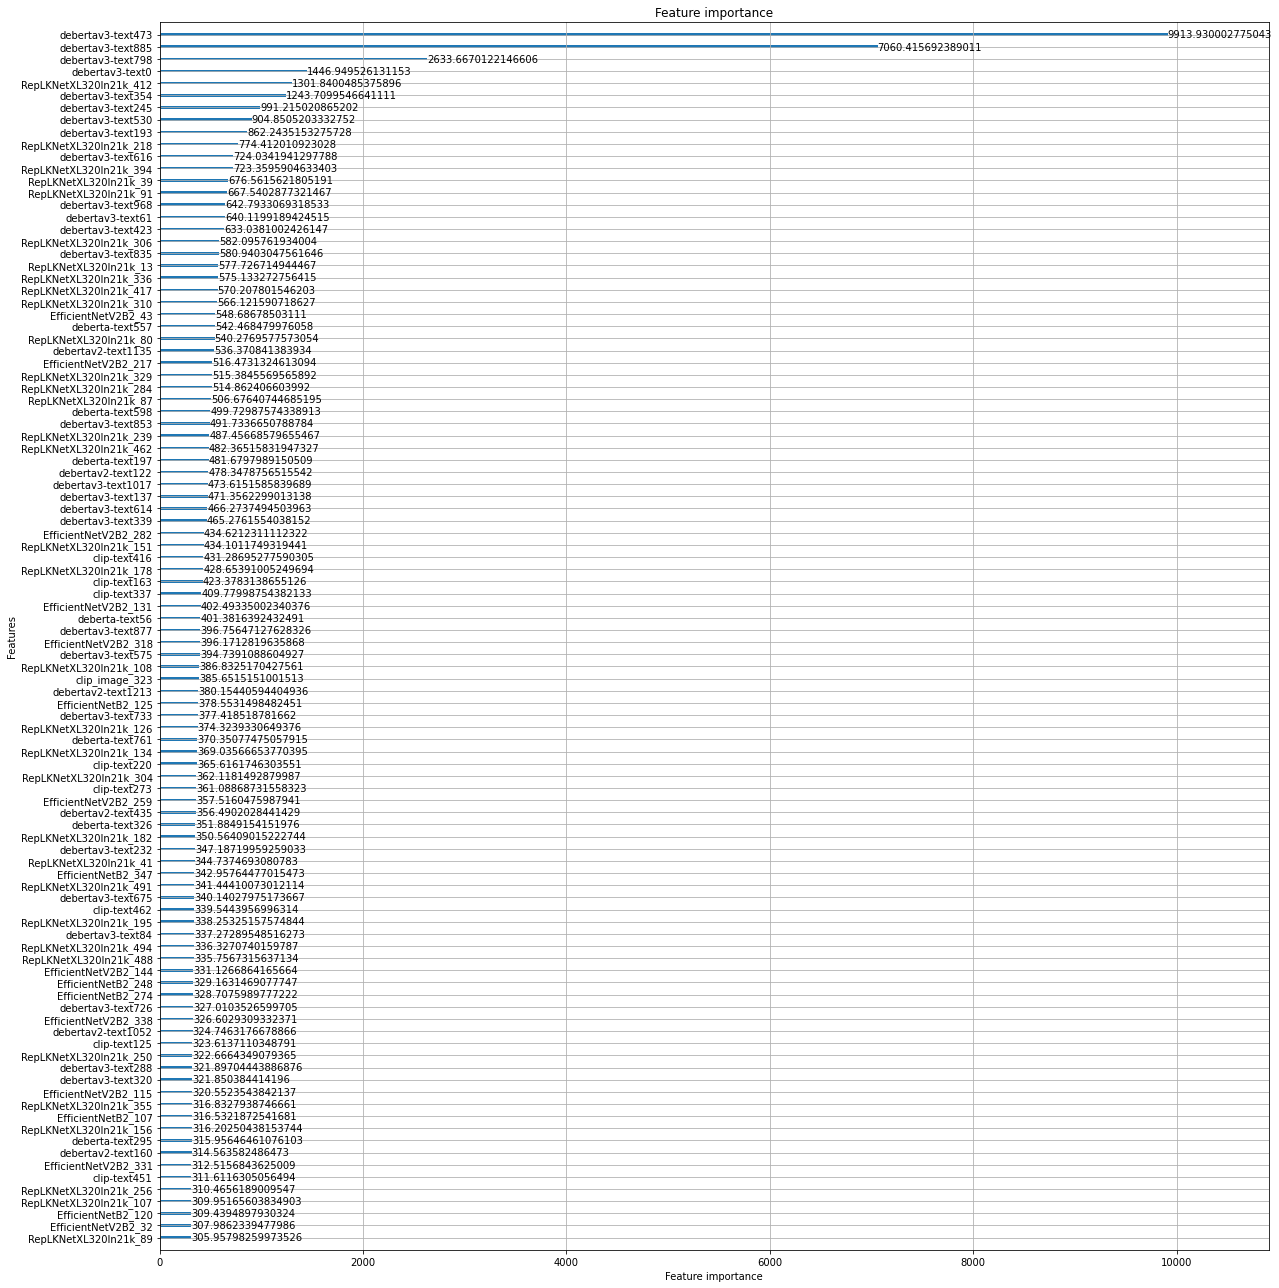

In [ ]:
#特徴量の重要度を可視化。
lgb.plot_importance(model_lgb, figsize=(18,18), max_num_features=100, importance_type='gain')
plt.tight_layout()
plt.show()

In [ ]:
submission_df["is_laugh"] = label

submission_df.head()

,id,is_laugh
0,rfdjcfsqq,0.457548
1,tsgqmfpef,0.275268
2,owjcthkz2,0.252047
3,rvgaocjyy,0.440090
4,uxtwu5i69,0.837777


In [ ]:
submission_df.to_csv(('/content/drive/MyDrive/nishika/sub.csv'), index=False)